<a href="https://colab.research.google.com/github/0xd1rac/cv-papers/blob/main/resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resnet Paper - Main Learning Points

## 1. Introduction to Residual Learning
  - The ResNet paper introduces the concept of residual learning, where instead of directly learning the desired mapping, the network learns the residual (difference) between the input and the output. This is formalized as $ F(x) = H(x) - x$, $H(x)$ is the desired function and x is the input.
  - A residual block consists of a series of convolutional layers with a skip connection (or shortcut) that bypasses these layers and adds the input directly to the output. This helps in addressing the vanishing gradient problem and allows for the training of much deeper networks

## 2. Overcoming Degradation Problem in Deep Networks:
  - Degradation Problem: Before ResNet, it was observed that simply stacking more layers in deep networks led to higher training error, which was not due to overfitting but rather due to the difficulty in optimizing very deep networks. This is referred to as the degradation problem.
  - Solution: Residual learning enables the construction of much deeper networks (e.g., 152 layers in ResNet-152) without suffering from degradation, as the skip connections provide a direct path for gradients to flow back during training

## 3. The importance of Depth
  - Empirical Results: The paper provides empirical evidence that deeper networks generally perform better when properly trained. The ResNet architecture demonstrated that networks could be successfully trained with over 100 layers, significantly deeper than previous models like VGG.
  
  - Impact on Network Design: The success of ResNet led to a shift in the deep learning community towards designing deeper networks with residual connections, influencing subsequent architectures such as DenseNet, Inception-ResNet, and others.

# Package Installation

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


# Resnet Pretrained Naming Conventions

In [10]:
import torch
import torchvision.models as models
res18 = models.resnet18(pretrained=True)
res34 = models.resnet34(pretrained=True)
res50 = models.resnet50(pretrained=True)
res101 = models.resnet101(pretrained=True)
res152 = models.resnet152(pretrained=True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 152MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloadi

KeyboardInterrupt: 

In [ ]:
pretrained_models = [res18, res34, res50, res101, res152]

In [ ]:
print(res18)

In [ ]:
print(res34)

In [ ]:
print(res50)

In [ ]:
print(res101)

In [ ]:
print(res152)

# Residual/Shortcut Connections

<center>
  <img src="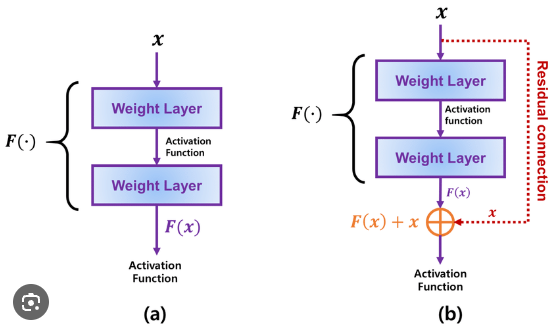"

Residual connections are the core innovation introduced in the ResNet paper. The stack of convolution layers is modelled as a function, $ H(x) $. However instead of learning $ H(x) $ directly, we decomponse it into $ H(x) = F(x) + x $. The network learns the residual mapping, $ F(x) $ instead of the original, $ H(x) $. Learning the residul, $F(x)$ makes the optimization process so much easier as
1. If H(x) is close to x, the residual F(x) is small. Learning small changes is simpler and more stable. This makes the optimization task for each layer easier
2. Residual learning allows each layer to start from an identity mapping, $ y = H(x) = F(x) + x = 0 + x $. The network only needs to learn the adjustments, which are often small
3. The shortcut / residul connections helps preserve gradient flow during backpropagation. This helps mitigate the vanish gradient problem.

\

There are three types of shortcut/residual connections:
1. zero-padding shortcuts if dim(x) != dim(F(x))

    - When the dimensions of the input x and the output of the residual function F(x) are not the same, one simple way to make them compatible for addition is to use zero-padding.
    - Zero-padding involves adding zeros to the input x to increase its dimensions (typically in the number of channels) to match the dimensions of F(x).
    - Eg: If x has 64 channels and F(x) has 256 channels, you would pad x with zeros to make it a 256-channel tensor before adding it to F(x).

2. projection shortcuts if dim(x) != dim(F(x))
    - When the dimensions of the input x and F(x) are not the same, and you want to use a more effective approach than zero-padding, you can use a projection shortcut.
    - A projection shortcut uses a 1x1 convolution to transform the input x to match the dimensions of F(x).
    - This is more powerful than zero-padding because the 1x1 convolution is a learnable transformation that can adjust the input to better match the output, not just in terms of dimensions but also in terms of feature representation.
    - If x has 64 channels and F(x) has 256 channels, you would apply a 1x1 convolution to x to increase its channels to 256 before adding it to F(x).



3. projection shortcuts if dim(x) != dim(F(x)) and dim(x) == dim(F(x))
    - Even when the dimensions of the input x and F(x) are the same, a projection shortcut may still be used to match the input to the output more precisely, especially when you want to apply a transformation to the input.
    - This approach applies a 1x1 convolution to x even when the dimensions match.

For our implementation we go with option 2, "projection shortcuts if dim(x) != dim(F(x))

# Residual Blocks


The ResNet architecture introduces two types of residual blocks: Basic Block and Bottleneck Block. These blocks serve as the building blocks for different variants of ResNet.

**1. Basic Block**: ResNet-18, ResNet-34 \
**2. Bottleneck Block**: ResNet-50, ResNet-101, and ResNet-152

The residual block can be modelled as a function, $H(x)$ in the following manner:
$$
H(x) = ReLU(F(x) + x)
$$

where Basic Block and Bottleneck Blocks have different F(x).
$$
H_{basic}(x) = ReLU(F_{basic}(x) + x)
$$
$$
H_{bottleneck}(x) = ReLU(F_{bottleneck}(x) + x)
$$

## Basic Block

<center>
  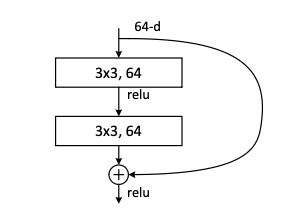
</center>


The output of a Basic Block can be expressed as
$$
y = ReLU(F_{basic}(x) + x) = ReLU(BN(Conv(ReLU(BN(Conv(x))))) + x )
$$

where x is the input to the block and y is the output from the block. \

**Structure:**
1. A 3x3 convolutional layer with in_channels input channels and out_channels output channels, followed by batch normalization and ReLU activation.
2. Another 3x3 convolutional layer with out_channels input and output channels, followed by batch normalization.
3. The output is then added to the input (identity connection), followed by a final ReLU activation.

**Expansion Factor:** \
The Basic Block has an expansion factor of 1, meaning the number of output channels remains the same as the number of input channels. \

If the input to a BasicBlock has 64 channels:

Input: 64 channels

1. Layer 1 (3x3 Convolution, 64 channels):
    - Input: 64 channels
    - Output: 64 channels
    - Followed by BatchNorm and ReLU activation.

2. Layer 2 (3x3 Convolution, 64 channels):
    - Input: 64 channels
    - Output: 64 channels
    - Followed by BatchNorm.

3. Addition with the Input (Identity Connection):
    - The output of Layer 2 is added element-wise to the original input (64 channels).
    
    - Followed by a final ReLU activation.


In [11]:
import torch.nn as nn
import torch.nn.functional as F
class BasicBlock(nn.Module):
    expansion = 1  # This should be a class attribute

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

## Bottleneck Block

<center>
  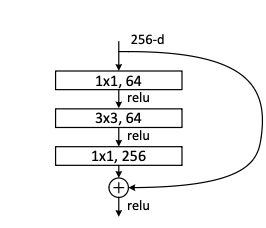
</center>


The output of a Bottleneck block can be expressed as:
$$
y = ReLU(F_{bottleneck}(x) + x) = ReLU(f_{3}(f_{2}(f_{1}(x)))+x)
$$
$$
f_{1}(x) = ReLU(BN(Conv(1x1,expansion))
$$
$$
f_{2}(x) = ReLU(BN(Conv(3x3)))
$$
$$
f_{3}(x) = BN(Conv(1x1,compression)))
$$

**Structure:**
1.
A 1x1 convolutional layer that reduces the dimensionality (reduces the number of channels).
2. A 3x3 convolutional layer that processes the reduced dimensions.
3. Another 1x1 convolutional layer that restores the dimensionality (expands the number of channels back to the original or more).

**Expansion Factor:** \
The Bottleneck block has an expansion factor of 4, meaning the number of output channels is four times the number of input channels after the final 1x1 convolution.

**Bottleneck Block Structure:**
1. 1x1 Convolution, 64 Channels:
    
    - This layer reduces the number of channels from the input to 64. This is often referred to as the "compression" step.
    
    - It reduces the dimensionality to make the subsequent 3x3 convolution less computationally expensive.

2. 3x3 Convolution, 64 Channels:

    - This layer processes the feature maps, keeping the number of channels at 64.

3. 1x1 Convolution, 256 Channels:

    - This is the expansion layer, where the number of channels is increased (expanded) to 256.
    
    - The expansion factor is determined by this final step where the number of channels is increased by a factor of 4 relative to the initial compressed layer.





In [12]:
class Bottleneck(nn.Module):
    """
    The Bottleneck block uses an expansion factor of 4, which means the number of output
    channels after the third convolution is four times the number of output channels after
    the first convolution.
    """
    expansion = 4

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        # 1x1 convolution to reduce channels
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        # 3x3 convolution to process spatial dimensions
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # 1x1 convolution to restore channels
        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, kernel_size=1, stride=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)

        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

# Resnet Model Classes

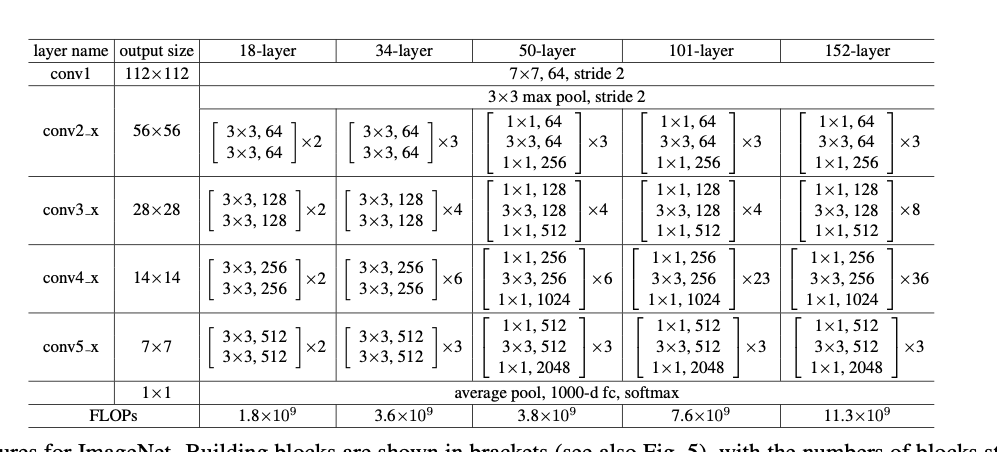

**Downsampling in Convolutional Neural Networks (CNNs)**

Downsampling is a technique used in convolutional neural networks (CNNs) to reduce the spatial dimensions (height and width) of feature maps while often increasing the depth (number of channels)

A common downsampling techinque is Strided Convolution \
   - Input: 32 x 32 feature map
   - Strided Conv with Stride 2 (10 filters):  
     Results iv 16 x 16 feature map of count 10




## Resnet Basic Block (Resnet 18 and Resnet 34)

In [22]:
import torch
import torch.nn as nn

class ResNetBasicBlock(nn.Module):
    def __init__(self, layers, input_channels=3, num_classes=1000):
        super(ResNetBasicBlock, self).__init__()

        # Initial convolutional layer with kernel size 7x7, stride 2, and padding 3
        # This layer increases the number of channels from input_channels (usually 3 for RGB images) to 64
        self.conv1 = nn.Conv2d(input_channels, 64, kernel_size=7, stride=2, padding=3, bias=False)

        # Track the number of input channels for subsequent layers
        self.in_channels = 64

        # Batch normalization and ReLU activation for the initial convolutional layer
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)

        # Max pooling to reduce the spatial dimensions of the feature maps
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        # First residual block layer - no downsampling
        self.layer1 = self._make_layer(BasicBlock, 64, layers[0])

        # Second residual block layer - downsampling occurs due to stride=2
        self.layer2 = self._make_layer(BasicBlock, 128, layers[1], stride=2)

        # Third residual block layer - downsampling occurs due to stride=2
        self.layer3 = self._make_layer(BasicBlock, 256, layers[2], stride=2)

        # Fourth residual block layer - downsampling occurs due to stride=2
        self.layer4 = self._make_layer(BasicBlock, 512, layers[3], stride=2)

        # Adaptive average pooling to reduce each feature map to a 1x1 spatial dimension
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))

        # Fully connected layer to map the feature maps to the number of classes
        self.fc = nn.Linear(512 * BasicBlock.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        # Create a residual block layer

        downsample = None

        # If stride != 1 or input channels don't match output channels (after expansion), use downsampling
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []

        # Add the first block to the layer, with downsampling if needed
        layers.append(block(self.in_channels, out_channels, stride, downsample))

        # Update in_channels for the subsequent blocks
        self.in_channels = out_channels * block.expansion

        # Add the remaining blocks (if any) to the layer
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        # Return the layer as a sequential container
        return nn.Sequential(*layers)

    def forward(self, x):
        # Forward pass through the initial convolutional layer, batch normalization, and ReLU activation
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        # Forward pass through the max pooling layer
        x = self.maxpool(x)

        # Forward pass through each of the residual block layers
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        # Forward pass through the adaptive average pooling layer
        x = self.avgpool(x)

        # Flatten the output from the pooling layer to prepare it for the fully connected layer
        x = torch.flatten(x, 1)

        # Forward pass through the fully connected layer to get the final output
        x = self.fc(x)

        return x

## Resnet Bottleneck (Resnet50, Resnet 101, Resnet 152)

In [23]:
class ResNetBottleneck(nn.Module):
    def __init__(self, layers, num_classes=1000):
        super(ResNetBottleneck, self).__init__()
        self.in_channels = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(Bottleneck, 64, layers[0])
        self.layer2 = self._make_layer(Bottleneck, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(Bottleneck, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(Bottleneck, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * Bottleneck.expansion, num_classes)

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

In [31]:
from torchvision.models import ResNet50_Weights, ResNet101_Weights, ResNet152_Weights
import torchvision.models as models

# Load pretrained weights for ResNet-18
def load_resnet18_weights(model):
    pretrained_model = models.resnet18(pretrained=True)
    pretrained_state_dict = pretrained_model.state_dict()
    model.load_state_dict(pretrained_state_dict)
    return model

# Load pretrained weights for ResNet-34
def load_resnet34_weights(model):
    pretrained_model = models.resnet34(pretrained=True)
    pretrained_state_dict = pretrained_model.state_dict()
    model.load_state_dict(pretrained_state_dict)
    return model


# Function to load pretrained weights for ResNet-50
def load_resnet50_weights(model):
    pretrained_model = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
    model.load_state_dict(pretrained_model.state_dict())
    return model

# Function to load pretrained weights for ResNet-101
def load_resnet101_weights(model):
    pretrained_model = models.resnet101(weights=ResNet101_Weights.IMAGENET1K_V1)
    model.load_state_dict(pretrained_model.state_dict())
    return model

# Function to load pretrained weights for ResNet-152
def load_resnet152_weights(model):
    pretrained_model = models.resnet152(weights=ResNet152_Weights.IMAGENET1K_V1)
    model.load_state_dict(pretrained_model.state_dict())
    return model


# Evaluation using Cifar-10

In [32]:
model_resnet18 = load_resnet18_weights(ResNetBasicBlock([2,2,2,2]))
model_resnet34 = load_resnet34_weights(ResNetBasicBlock([3, 4, 6, 3]))
model_resnet50 = load_resnet50_weights(ResNetBottleneck([3, 4, 6, 3]))
model_resnet101 = load_resnet101_weights(ResNetBottleneck([3, 4, 23, 3]))
model_resnet_152 = load_resnet152_weights(ResNetBottleneck([3, 8, 36, 3]))
models_loaded = [model_resnet18, model_resnet34, model_resnet50, model_resnet101, model_resnet_152]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
models_loaded = [model.to(device) for model in models_loaded]

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weig

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


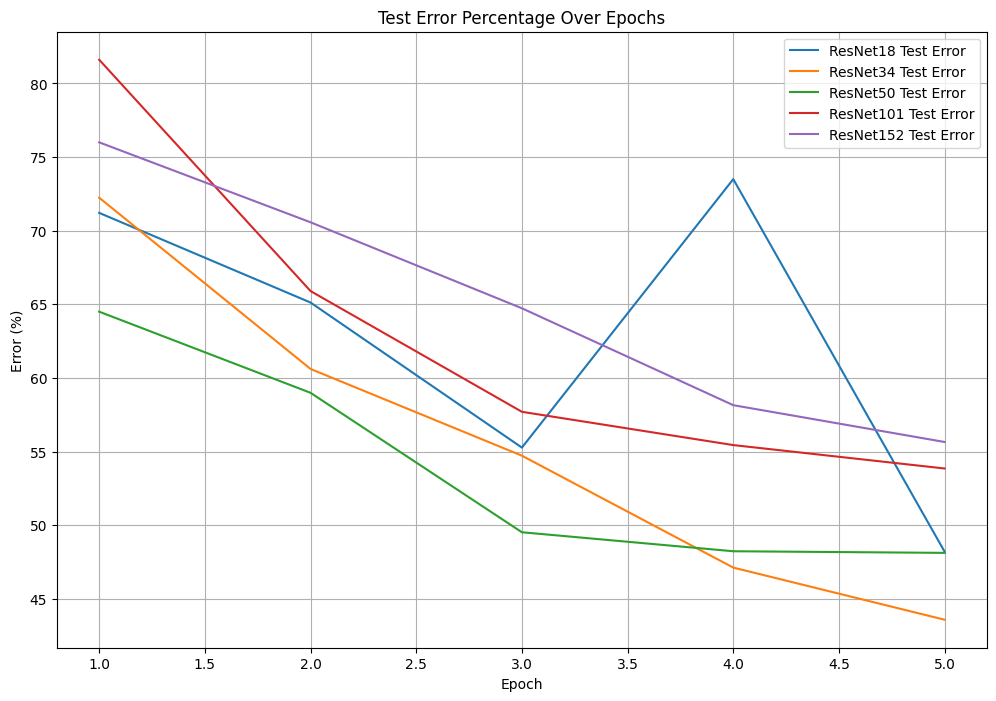

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np


# Load CIFAR-10 dataset
transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=4)

# Training and evaluation setup
criterion = nn.CrossEntropyLoss()
num_epochs = 5

def train_and_evaluate(model):
    optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

    train_errors = []
    test_errors = []

    for epoch in range(num_epochs):
        model.train()
        correct = 0
        total = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

        train_error = 100.0 - (100.0 * correct / total)
        train_errors.append(train_error)

        # Evaluate on the test set
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = outputs.max(1)
                total += labels.size(0)
                correct += predicted.eq(labels).sum().item()

        test_error = 100.0 - (100.0 * correct / total)
        test_errors.append(test_error)

        scheduler.step()

    return train_errors, test_errors

# Train and evaluate all models, and store errors
all_train_errors = []
all_test_errors = []

for model in models_loaded:
    train_errors, test_errors = train_and_evaluate(model)
    all_train_errors.append(train_errors)
    all_test_errors.append(test_errors)

# Plotting the error for all models
model_names = ['ResNet18', 'ResNet34', 'ResNet50', 'ResNet101', 'ResNet152']
plt.figure(figsize=(12, 8))
for i, model_name in enumerate(model_names):
    plt.plot(range(1, num_epochs + 1), all_test_errors[i], label=f'{model_name} Test Error')
plt.xlabel('Epoch')
plt.ylabel('Error (%)')
plt.title('Test Error Percentage Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Standard deviation of layer responses for ResNet18: {'conv1': 5.871247, 'layer1.0.conv1': 2.4467826, 'layer2.0.conv1': 1.1944522, 'layer3.0.conv1': 0.60666704, 'layer4.0.conv1': 0.22483872}
Standard deviation of layer responses for ResNet34: {'conv1': 3.6292858, 'layer1.0.conv1': 1.226556, 'layer2.0.conv1': 0.9986953, 'layer3.0.conv1': 0.40474936, 'layer4.0.conv1': 0.23654951}
Standard deviation of layer responses for ResNet50: {'conv1': 5.1645856, 'layer1.0.conv1': 0.47809428, 'layer2.0.conv1': 0.365721, 'layer3.0.conv1': 0.31985587, 'layer4.0.conv1': 0.43017623}
Standard deviation of layer responses for ResNet101: {'conv1': 5.824037, 'layer1.0.conv1': 0.8081504, 'layer2.0.conv1': 0.36988813, 'layer3.0.conv1': 0.31129047, 'layer4.0.conv1': 0.51363975}
Standard deviation of layer responses for ResNet152: {'conv1': 7.6305633, 'layer1.0.conv1': 0.76751024, 'layer2.0.conv1': 0.3896967, 'layer3.0.conv1': 0.3496663, 'layer4.0.conv1': 0.12229515}


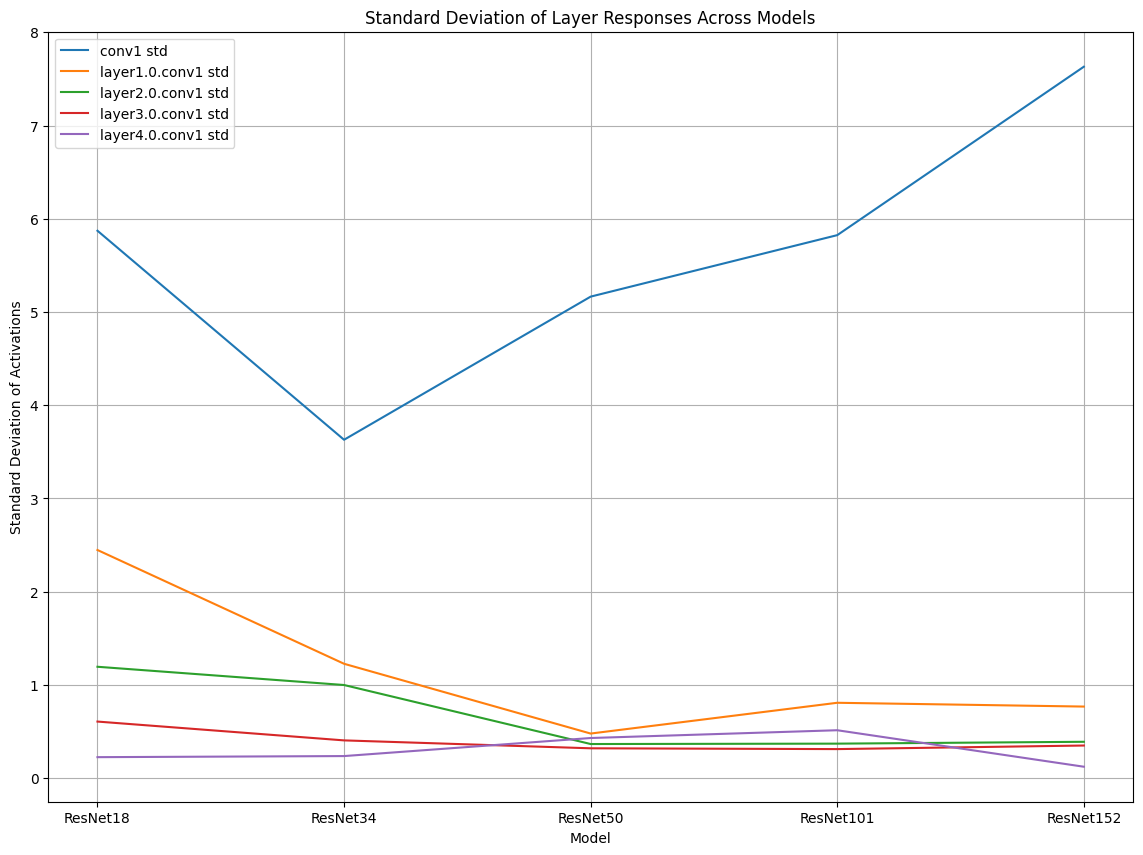

In [35]:
# Calculate and plot the standard deviation of activations for each layer
def layer_response_std(model, data_loader, layer_names):
    model.eval()
    layer_stds = {layer: [] for layer in layer_names}

    def get_activation(name):
        def hook_fn(model, input, output):
            activations = output.detach().cpu().numpy()
            std_activations = np.std(activations, axis=0)
            layer_stds[name].append(std_activations)
        return hook_fn

    hooks = []
    for name, module in model.named_modules():
        if name in layer_names:
            hooks.append(module.register_forward_hook(get_activation(name)))

    with torch.no_grad():
        for inputs, _ in data_loader:
            inputs = inputs.to(device)
            model(inputs)  # Forward pass

    # Remove hooks
    for hook in hooks:
        hook.remove()

    # Compute the mean standard deviation across all batches
    mean_stds = {layer: np.mean(np.concatenate(stds, axis=0)) for layer, stds in layer_stds.items()}
    return mean_stds

# Specify layers of interest
layer_names = ['conv1', 'layer1.0.conv1', 'layer2.0.conv1', 'layer3.0.conv1', 'layer4.0.conv1']
stds_by_model = []

for model, model_name in zip(models_loaded, model_names):
    stds = layer_response_std(model, test_loader, layer_names)
    stds_by_model.append(stds)
    print(f'Standard deviation of layer responses for {model_name}: {stds}')

# Plot the standard deviation for each layer across models
plt.figure(figsize=(14, 10))
for i, layer_name in enumerate(layer_names):
    layer_stds = [stds[layer_name] for stds in stds_by_model]
    plt.plot(model_names, layer_stds, label=f'{layer_name} std')

plt.xlabel('Model')
plt.ylabel('Standard Deviation of Activations')
plt.title('Standard Deviation of Layer Responses Across Models')
plt.legend()
plt.grid(True)
plt.show()
